In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [3]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [4]:
cur_path

'd:\\vaibh\\Downloads'

In [5]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [6]:
data = np.array(data)
labels = np.array(labels)

In [7]:
#os.mkdir('training')
np.save('./training/data',data)
np.save('./training/target',labels)

In [8]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [10]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [11]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 42s 42ms/step - loss: 1.9203 - accuracy: 0.5057 - val_loss: 0.6084 - val_accuracy: 0.8494
Epoch 2/20
981/981 [==============================] - 43s 43ms/step - loss: 0.8550 - accuracy: 0.7442 - val_loss: 0.2953 - val_accuracy: 0.9223
Epoch 3/20
981/981 [==============================] - 44s 45ms/step - loss: 0.6532 - accuracy: 0.8055 - val_loss: 0.2351 - val_accuracy: 0.9390
Epoch 4/20
981/981 [==============================] - 43s 43ms/step - loss: 0.5551 - accuracy: 0.8344 - val_loss: 0.1837 - val_accuracy: 0.9522
Epoch 5/20
981/981 [==============================] - 43s 43ms/step - loss: 0.4906 - accuracy: 0.8514 - val_loss: 0.1763 - val_accuracy: 0.9489
Epoch 6/20
981/981 [==============================] - 43s 43ms/step - loss: 0.4660 - accuracy: 0.8608 - val_loss: 0.2250 - val_accuracy: 0.9333
Epoch 7/20
981/981 [==============================] - 43s 44ms/step - loss: 0.4284 - accuracy: 0.8722 - val_loss: 0.1219 - val_accuracy:

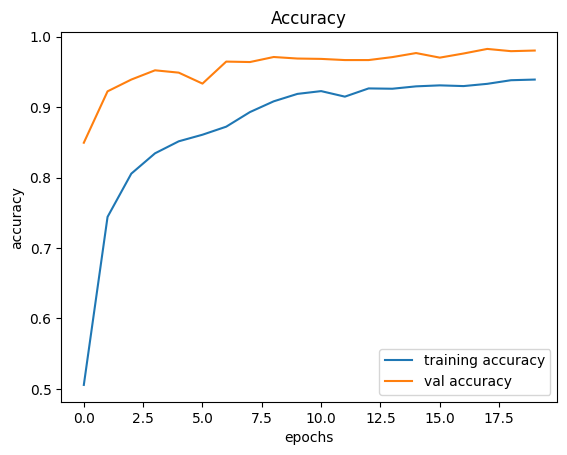

In [14]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

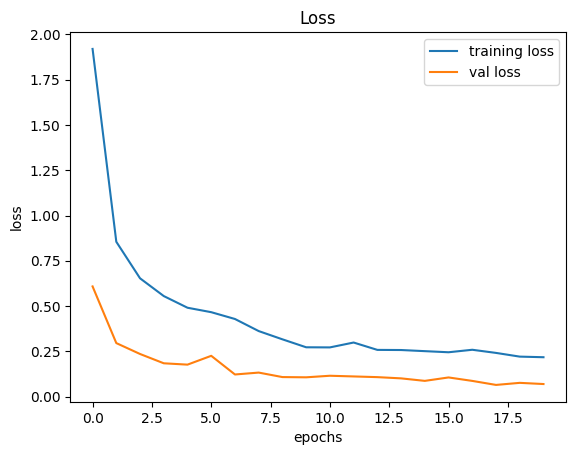

In [15]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [17]:
X_test, label = testing('Test.csv')

In [18]:
X_test, label
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

395/395 [==============================] - 2s 5ms/step


In [19]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs: 
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)

pred=model.predict(X_test) 
classes=np.argmax(pred,axis=1)

395/395 [==============================] - 2s 5ms/step


In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, classes))

0.9387173396674584


In [21]:
model.save("./training/TSR.h5")

In [22]:

from keras.models import load_model
model = load_model('./training/TSR.h5')

In [23]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
           30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [24]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    
    predict=model.predict(X_test) 
    classes=np.argmax(predict,axis=1)
    return image,classes

1/1 [==============================] - 0s 22ms/step
Predicted traffic sign is:  No entry


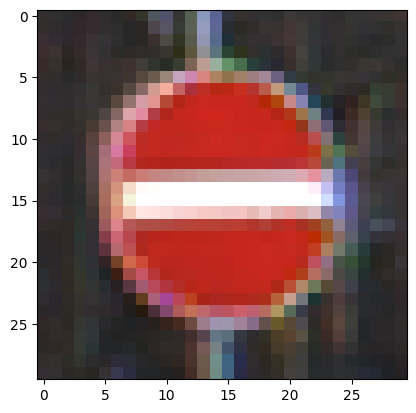

In [28]:
plot,prediction = test_on_img(r'Test/00200.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()